<a href="https://colab.research.google.com/github/achmadbadri/UjiCoba/blob/main/2019_s_d_2020_ANTM_VOLATILITY_Versi_Matt_Cullen_Meyer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tinytrader.io/how-to-calculate-historical-price-volatility-with-python/

By Matt Cullen-Meyer, CFA

In [1]:
pip install yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=5a162b823233fbc7b79ee77c0319c9b86eec9dc6cfcb2dae2ec05fa37a8bb49d
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


In [2]:
from yahoofinancials import YahooFinancials
from datetime import date, timedelta
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files



In [3]:
# set stock ticker symbol
stock_symbol = 'ANTM.JK'
 
# set date range for historical prices
end_time = date(2020,1,1)
start_time = datetime.date(2019,1,1)
 
# reformat date range
end = end_time.strftime('%Y-%m-%d')
start = start_time.strftime('%Y-%m-%d')
 
# get daily stock prices over date range
json_prices = YahooFinancials(stock_symbol
    ).get_historical_price_data(start, end, 'daily')

In [4]:
# transform json file to dataframe
prices = pd.DataFrame(json_prices[stock_symbol]
    ['prices'])[['formatted_date', 'close']]
 
# sort dates in descending order
prices.sort_index(ascending=False, inplace=True)

In [5]:
prices

,formatted_date,close
257,2019-12-30,840.0
256,2019-12-27,835.0
255,2019-12-26,840.0
254,2019-12-23,825.0
253,2019-12-20,830.0
...,...,...
4,2019-01-07,770.0
3,2019-01-04,760.0
2,2019-01-03,750.0
1,2019-01-02,740.0


In [6]:
prices.tail()

,formatted_date,close
4,2019-01-07,770.0
3,2019-01-04,760.0
2,2019-01-03,750.0
1,2019-01-02,740.0
0,2019-01-01,765.0


In [7]:
# calculate daily logarithmic return
prices['returns'] = (np.log(prices.close /
    prices.close.shift(-1)))
      
# calculate daily standard deviation of returns
daily_std = np.std(prices.returns)
  
# annualized daily standard deviation
std = daily_std * 252 ** 0.5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

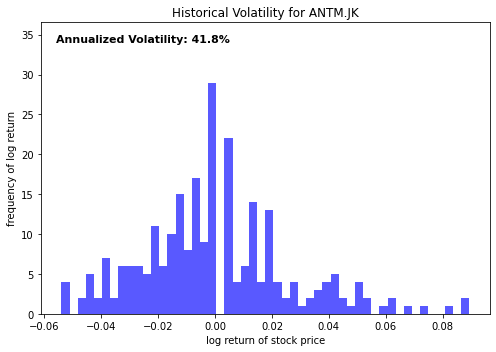

In [8]:
# Plot histograms
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
n, bins, patches = ax.hist(
    prices.returns.values,
    bins=50, alpha=0.65, color='blue')
 
ax.set_xlabel('log return of stock price')
ax.set_ylabel('frequency of log return')
ax.set_title('Historical Volatility for ' +
    stock_symbol)
  
# get x and y coordinate limits
x_corr = ax.get_xlim()
y_corr = ax.get_ylim()
  
# make room for text
header = y_corr[1] / 5
y_corr = (y_corr[0], y_corr[1] + header)
ax.set_ylim(y_corr[0], y_corr[1])
 
# print historical volatility on plot
x = x_corr[0] + (x_corr[1] - x_corr[0]) / 30
y = y_corr[1] - (y_corr[1] - y_corr[0]) / 15
ax.text(x, y , 'Annualized Volatility: ' + str(np.round(std*100, 1))+'%',
    fontsize=11, fontweight='bold')
x = x_corr[0] + (x_corr[1] - x_corr[0]) / 15
y -= (y_corr[1] - y_corr[0]) / 20
 
# save histogram plot of historical price volatility
fig.tight_layout()
fig.savefig('Historical Volatility - ANTM.png')
files.download("Historical Volatility - ANTM.png") 